# 1. Prepare Problem

## a) Load libraries

In [67]:
import numpy
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pandas as pd
from pandas.plotting import scatter_matrix

## b) Load dataset

In [ ]:
ames = pd.read_csv('..\Ames.csv')

In [16]:
# 2. Summarize Data
# a) Descriptive statistics
# b) Data visualizations
# 3. Prepare Data
# a) Data Cleaning
# b) Feature Selection
# c) Data Transforms

# 4. Evaluate Algorithms

## Declare X and y

In [2]:
ames = pd.read_csv('..\Ames.csv').select_dtypes(include=['float64', 'int64']).dropna()
# print(ames.shape)
X = ames.drop(columns=['SalePrice'])
y = ames['SalePrice']
print(X.shape)
print(y.shape)

(1914, 40)
(1914,)


## a) Split-out validation dataset

In [3]:
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.20, random_state=42)

## b) Test options and evaluation metric

In [47]:
# Test options and evaluation metric
num_folds = 10
seed = 7
# scoring = 'neg_mean_squared_error'
scoring = 'r2'

## c) Spot Check Algorithms

In [50]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso(max_iter=50000)))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
# models.append(('MLP', MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000)))

In [51]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    # msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    msg = "{}: {:,.2f} ({:,.2f})".format(name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.87 (0.03)


c:\Users\James\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.072e+11, tolerance: 8.809e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\James\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.990e+11, tolerance: 8.573e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\James\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

LASSO: 0.88 (0.02)


c:\Users\James\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.716e+11, tolerance: 8.787e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\James\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.202e+11, tolerance: 8.201e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\James\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

EN: 0.87 (0.02)
KNN: 0.68 (0.05)
CART: 0.79 (0.06)
SVR: -0.09 (0.06)


## d) Compare Algorithms

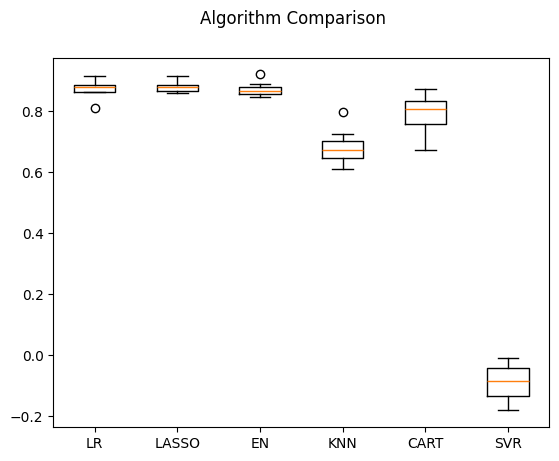

In [52]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# Standardization

In [79]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso(max_iter=50000))])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
# pipelines.append(('ScaledMLP', Pipeline([('Scaler', StandardScaler()),('MLP', MLPRegressor(hidden_layer_sizes=(2,), max_iter=50000))])))

In [80]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    # msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    msg = "{}: {:,.2f} ({:,.2f})".format(name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.88 (0.02)
ScaledLASSO: 0.88 (0.02)
ScaledEN: 0.86 (0.03)
ScaledKNN: 0.85 (0.03)
ScaledCART: 0.78 (0.06)
ScaledSVR: -0.09 (0.06)


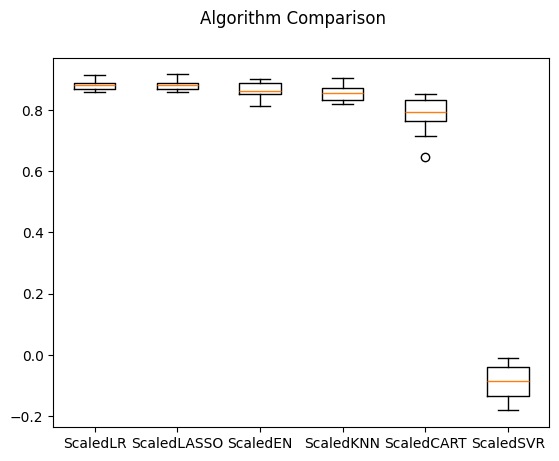

In [81]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# 5. Improve Accuracy

## a) Algorithm Tuning

In [82]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler().fit(X_train)  # Fit scaler on training data
rescaledX = scaler.transform(X_train)  # Rescale training data
alpha_values = np.logspace(-6, 6, 13)  # log scale for alpha, from 1e-6 to 1e+6
param_grid = dict(alpha=alpha_values)
model = Ridge()
kfold = KFold(n_splits=5, random_state=42, shuffle=True)  # 5-fold cross-validation
scoring = 'r2'  # You can use other scoring metrics like 'r2', 'neg_mean_absolute_error', etc.
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print(f"Best alpha: {grid_result.best_params_['alpha']}")
print(f"Best score: {grid_result.best_score_}")


Best alpha: 100.0
Best score: 0.877427380403803


In [83]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)

In [84]:
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 0.855610 using {'n_neighbors': 5}


In [86]:
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.792255 (0.044916) with: {'n_neighbors': 1}
0.842001 (0.033437) with: {'n_neighbors': 3}
0.855610 (0.026887) with: {'n_neighbors': 5}
0.854784 (0.028007) with: {'n_neighbors': 7}
0.848233 (0.030150) with: {'n_neighbors': 9}
0.843807 (0.030296) with: {'n_neighbors': 11}
0.840092 (0.034409) with: {'n_neighbors': 13}
0.836985 (0.036330) with: {'n_neighbors': 15}
0.833731 (0.038866) with: {'n_neighbors': 17}
0.829351 (0.042593) with: {'n_neighbors': 19}
0.826159 (0.043908) with: {'n_neighbors': 21}


## b) Ensembles

In [59]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())]))) 
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor(n_estimators=10))])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor(n_estimators=10))])))

In [60]:
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: 0.839511 (0.021337)
ScaledGBM: 0.922642 (0.017414)
ScaledRF: 0.892951 (0.025857)
ScaledET: 0.903118 (0.019793)


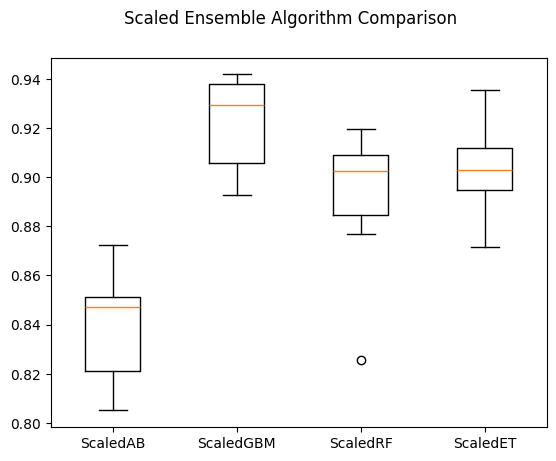

In [61]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## c) Tune Ensemble Methods

In [87]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)

In [88]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.929255 using {'n_estimators': 400}
0.910256 (0.021484) with: {'n_estimators': 50}
0.921940 (0.017695) with: {'n_estimators': 100}
0.924842 (0.016636) with: {'n_estimators': 150}
0.926520 (0.015982) with: {'n_estimators': 200}
0.927638 (0.015835) with: {'n_estimators': 250}
0.928348 (0.015813) with: {'n_estimators': 300}
0.928770 (0.015860) with: {'n_estimators': 350}
0.929255 (0.015592) with: {'n_estimators': 400}


# 6. Finalize Model

## a) Predictions on validation dataset

In [64]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=42, n_estimators=400)
model.fit(rescaledX, y_train)

GradientBoostingRegressor(n_estimators=400, random_state=42)

In [68]:
rescaledValidationX = scaler.transform(X_validate)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(y_validate, predictions))
print(r2_score(y_validate, predictions))

344956714.2367158
0.9441027279670758


In [76]:
y_validate

1651    165000
147     145000
2478    149000
2310    410000
543     167000
         ...  
2489    128500
1724    185000
776     190000
1089    216837
184     249700
Name: SalePrice, Length: 383, dtype: int64

## b) Create standalone model on entire training dataset

## c) Save model for later use